# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [8]:
import pandas as pd

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [13]:
urltemp1 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
temp1 = pd.read_csv(urltemp1) 

urltemp2 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"
temp2 = pd.read_csv(urltemp2) 

df = pd.concat([temp1, temp2]) 
df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [14]:
countries = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
meta = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

df["FIPS 10-4"] = df["ID"].str[0:2]

df_merge1 = pd.merge(df, countries, on = ["FIPS 10-4"])
df_merge2 = pd.merge(df_merge1, meta, on = ["ID"])
df_merge2
df_merge2drop = df_merge2.drop(["FIPS 10-4", "ISO 3166", "STNELEV"], axis = 1)
df_set = df_merge2drop.set_index(["ID", "NAME", "LATITUDE", "LONGITUDE", "Year", "Name"]) 

df_stack = df_set.stack() 
df_reset = df_stack.reset_index() 
df_rename = df_reset.rename(columns = {"Name" : "Country", "level_6" : "Month", 0 : "Temp"})
df_rename["Month"] = df_rename["Month"].str[5:].astype(int)
df_rename["Temp"] = df_rename["Temp"] / 100
df = df_rename
df

,ID,NAME,LATITUDE,LONGITUDE,Year,Country,Month,Temp
0,AG000060390,ALGER_DAR_EL_BEIDA,36.7167,3.250,1901,Algeria,1,10.34
1,AG000060390,ALGER_DAR_EL_BEIDA,36.7167,3.250,1901,Algeria,2,8.44
2,AG000060390,ALGER_DAR_EL_BEIDA,36.7167,3.250,1901,Algeria,3,11.64
3,AG000060390,ALGER_DAR_EL_BEIDA,36.7167,3.250,1901,Algeria,4,15.34
4,AG000060390,ALGER_DAR_EL_BEIDA,36.7167,3.250,1901,Algeria,5,15.64
...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,KABWE_MILLIKEN,-14.4500,28.467,2012,Zambia,4,19.70
1899683,ZAM00067663,KABWE_MILLIKEN,-14.4500,28.467,2012,Zambia,5,18.50
1899684,ZAM00067663,KABWE_MILLIKEN,-14.4500,28.467,2012,Zambia,6,17.50
1899685,ZAM00067663,KABWE_MILLIKEN,-14.4500,28.467,2015,Zambia,12,24.85


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [69]:
def query_climate(df, country, year_begin, year_end, month): 
    
    df = df[(df["Country"] == country) & 
            ((df["Year"] >= year_begin) & (df["Year"] <= year_end)) & 
            (df["Month"] == month)] 
    
    df = df[["NAME", "LATITUDE", "LONGITUDE", "Country", "Year", "Month", "Temp"]] 
    
    return df

Run this example and check if you get the correct result, your obtained dataframe looks like:

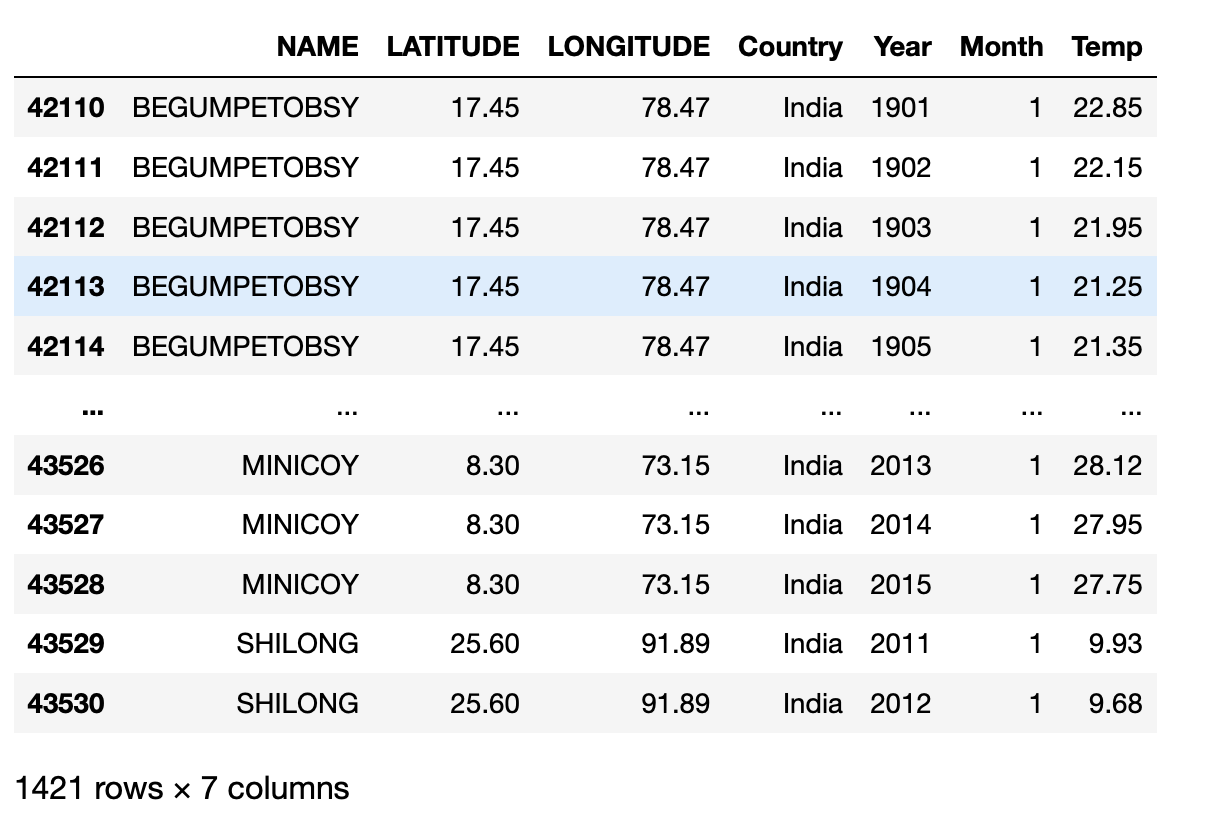

In [72]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df_rename, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442683,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442695,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442707,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
458426,MINICOY,8.30,73.15,India,2013,1,28.12
458438,MINICOY,8.30,73.15,India,2014,1,27.95
458450,MINICOY,8.30,73.15,India,2015,1,27.75
458454,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

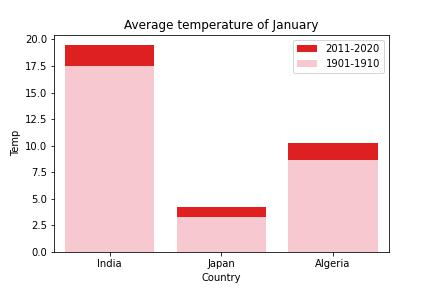

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

NameError: name 'query_climate' is not defined

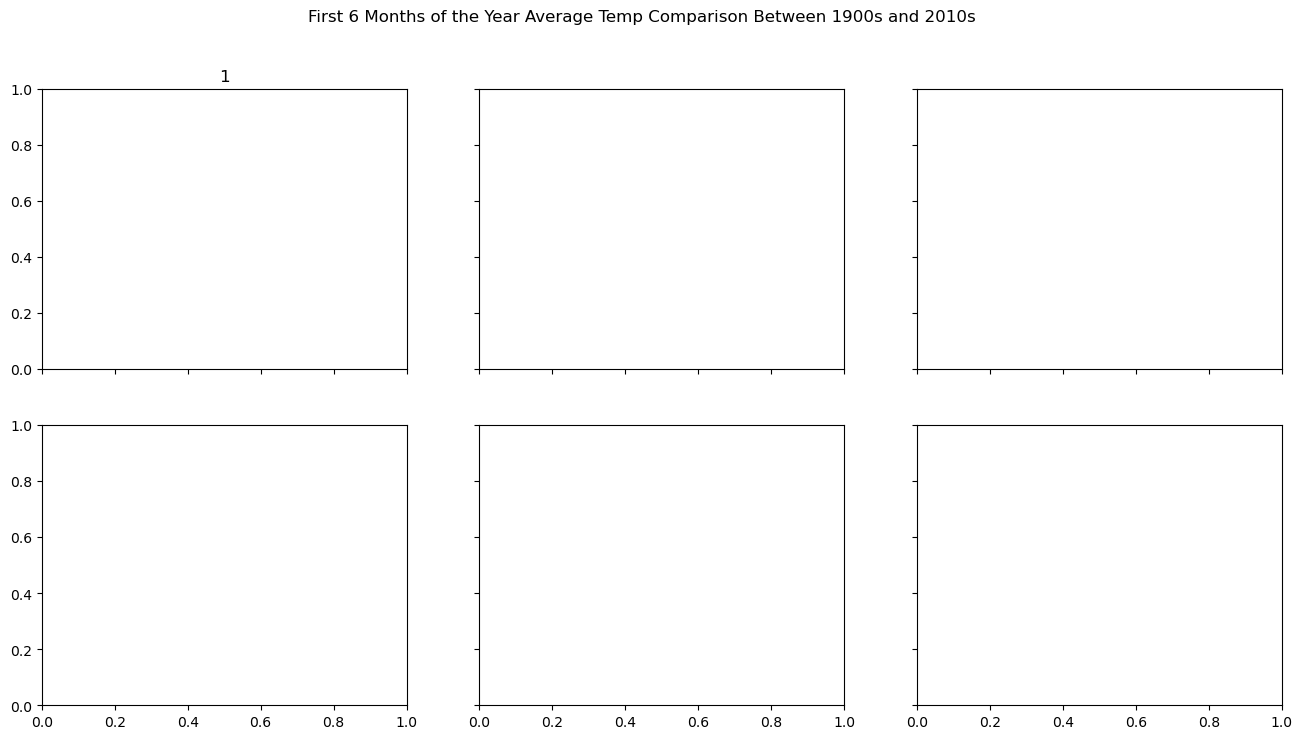

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

chosen_countries = ["India", "Japan", "Algeria", "Nigeria"] 
months = range(1, 7) 
fig, ax = plt.subplots(2, 3, sharex = True, sharey = True, figsize=(16,8)) 
fig.suptitle("First 6 Months of the Year Average Temp Comparison Between 1900s and 2010s") 

for month in months: 
    
    axis0 = int((month - 1) / 3) 
    axis1 = (month - 1) % 3
    ax[axis0, axis1].set(title = month)
    bar_dict_before = {} 
    bar_dict_after = {}
    
    for country in chosen_countries: 
        
        df_temp = query_climate(df = df_rename, country = country, year_begin = 1901, year_end = 1910, month = month)
        mean = df_temp["Temp"].mean
        bar_dict_before[country] = mean()
        
        df_temp = query_climate(df = df_rename, country = country, year_begin = 2010, year_end = 2020, month = month)
        mean = df_temp["Temp"].mean
        bar_dict_after[country] = mean()
    
    bar_df_before = pd.DataFrame(list(bar_dict_before.items()), columns = ["Country", "Temp"]) 
    bar_df_after = pd.DataFrame(list(bar_dict_after.items()), columns = ["Country", "Temp"]) 
    sns.barplot(bar_df_after, x = "Country", y = "Temp", color = "red", ax = ax[axis0, axis1])  
    sns.barplot(bar_df_before, x = "Country", y = "Temp", color = "lightcoral", ax = ax[axis0, axis1]) 
    ## NEED TO CREATE LEGEND

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

/var/folders/_m/zvdcljz572x44n3pr9c5lp700000gn/T/ipykernel_39647/2452818760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar["Over25"] = df_bar["Temp"] >= 25
/var/folders/_m/zvdcljz572x44n3pr9c5lp700000gn/T/ipykernel_39647/2452818760.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bar_1900 = df_bar[df["Year"] < 2000]
/var/folders/_m/zvdcljz572x44n3pr9c5lp700000gn/T/ipykernel_39647/2452818760.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bar_2000 = df_bar[df["Year"] > 2000]
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting

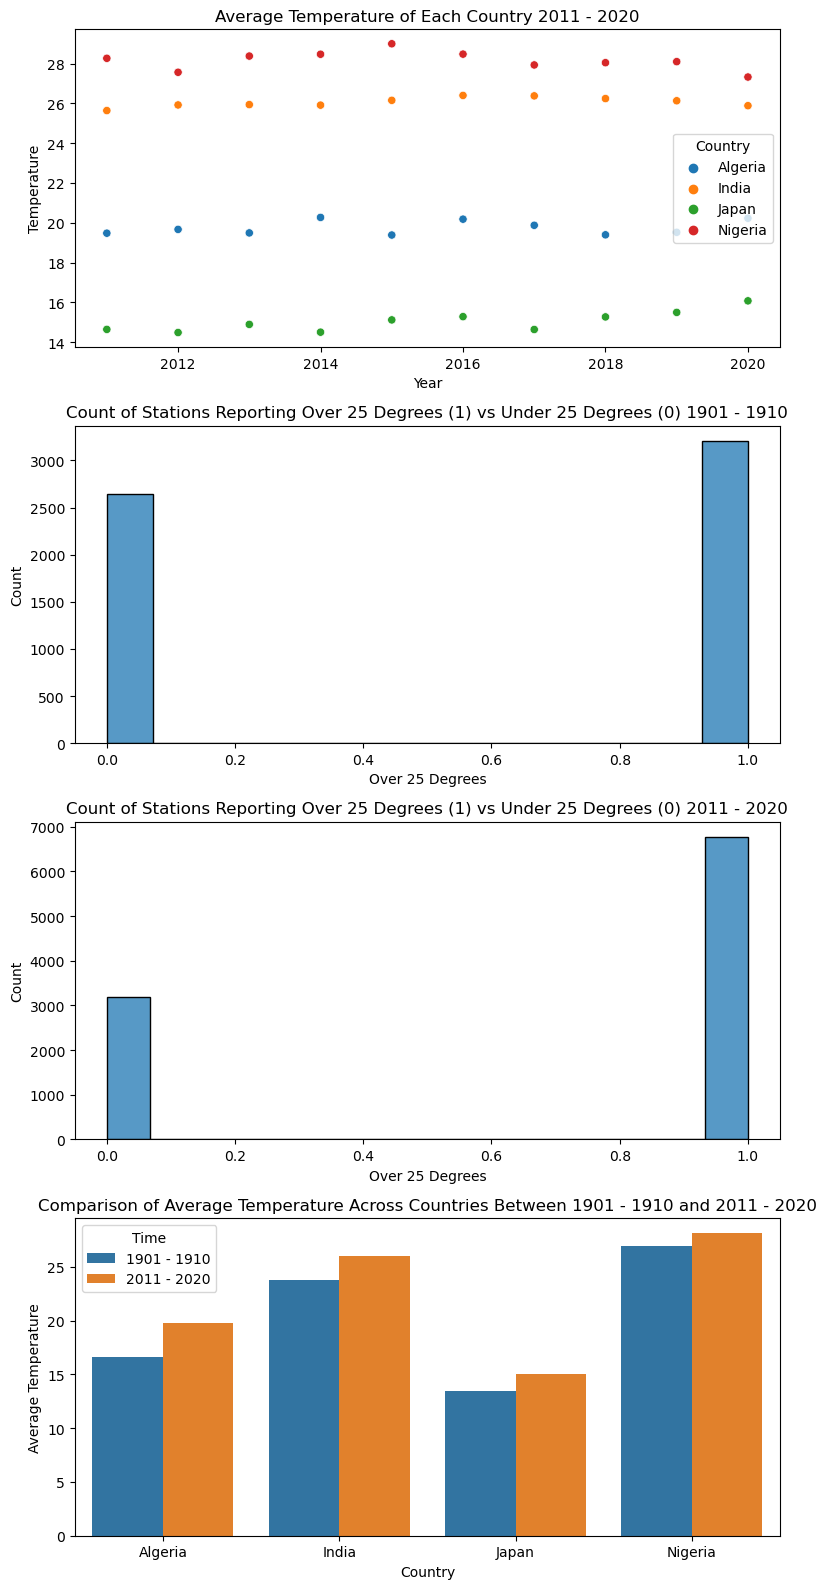

In [79]:
df_simplified = df[df["Country"].isin(["India", "Japan", "Algeria", "Nigeria"]) & 
                   (df["Year"] >= 2000)] 
df_means = df_simplified.groupby(["Country", "Year"])["Temp"].mean() 
df_means = df_means.reset_index()

fig, ax = plt.subplots(4, 1, figsize=(8, 16))
sns.scatterplot(df_means, x = "Year", y = "Temp", hue = "Country", ax = ax[0]) 
ax[0].set(title = "Average Temperature of Each Country 2011 - 2020", ylabel = "Temperature")

df_bar = df[df["Country"] == "India"] 
df_bar["Over25"] = df_bar["Temp"] >= 25
df_bar_1900 = df_bar[df["Year"] < 2000] 
df_bar_2000 = df_bar[df["Year"] > 2000] 
sns.histplot(df_bar_1900, x = "Over25", ax = ax[1]) 
sns.histplot(df_bar_2000, x = "Over25", ax = ax[2]) 
ax[1].set(title = "Count of Stations Reporting Over 25 Degrees (1) vs Under 25 Degrees (0) 1901 - 1910", xlabel = "Over 25 Degrees") 
ax[2].set(title = "Count of Stations Reporting Over 25 Degrees (1) vs Under 25 Degrees (0) 2011 - 2020", xlabel = "Over 25 Degrees")

df_simplified = df[df["Country"].isin(["India", "Japan", "Algeria", "Nigeria"])]
df_simplified["Late"] = df["Year"] > 2000
df_means = df_simplified.groupby(["Country", "Late"])["Temp"].mean() 
df_means = df_means.reset_index()
df_means["Time"] = df_means["Late"].map({True : "2011 - 2020", False : "1901 - 1910"})  
sns.barplot(df_means, x = "Country", y = "Temp", hue = "Time", ax = ax[3]) 
ax[3].set(title = "Comparison of Average Temperature Across Countries Between 1901 - 1910 and 2011 - 2020", ylabel = "Average Temperature") 
fig.tight_layout()


## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell